In [1]:
import numpy as np
import matplotlib.pyplot as plt

import camb

from scipy.interpolate import interp1d

import sys
sys.path.append('../')

from pyACC.Clustering import get_power_spectrum
from pyACC.Clustering import generate_gaussian_map

In [2]:
#Parametri per generare spettro
Omega_b = 0.05
Omega_c = 0.25

h = 0.7
As = 2.1e-9
ns = 0.96

pars = camb.CAMBparams()
pars.set_cosmology(H0=100*h, ombh2=Omega_b*h**2, omch2=Omega_c*h**2)
pars.InitPower.set_params(As=As, ns=ns);

In [3]:
pars.set_matter_power(redshifts=[10.], kmax=100.0)

result = camb.get_results(pars)

kh, z, pk = result.get_matter_power_spectrum(minkh=1e-4, maxkh=100, npoints = 512)

In [4]:
# Define power spectrum interpolatore
pk_func = interp1d(kh, pk[0], fill_value='extrapolate', kind='cubic')

In [5]:
# Define the box
side = 500 # Mpc/h
spacing = 5 # Mpc/h

In [6]:
delta_k, delta_x = generate_gaussian_map(pk_func, side, spacing)

delta_k.shape, delta_x.shape


((100, 100, 51), (100, 100, 100))

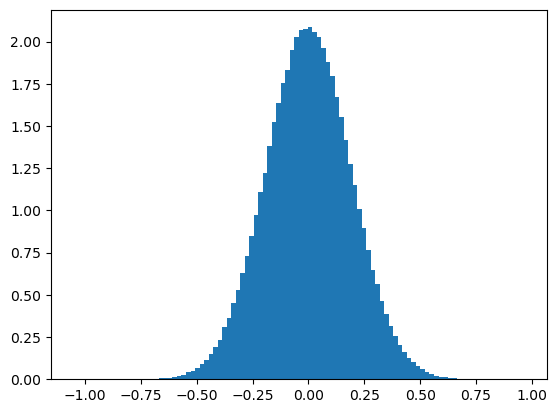

In [7]:
plt.hist(delta_x.flatten(), bins=100, density=True);

In [8]:
# Get the power spectrum 

n_kF = 3

k_bins, pk_meas = get_power_spectrum(delta_k, side, spacing, n_kF=n_kF)

/home/git/anaconda3/envs/acc-env/lib/python3.9/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/home/git/anaconda3/envs/acc-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/git/anaconda3/envs/acc-env/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


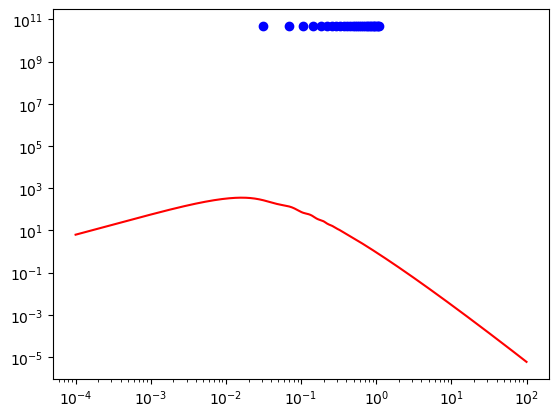

In [9]:
plt.loglog(k_bins, pk_meas, 'o', color='b', label='Measured')
plt.loglog(kh, pk[0], color='r', label='Theoretical')

In [10]:
# Generate points

n_mean = 1.e-3 # Mean number density 

Volume = side ** 3

N_part = Volume * n_mean


In [11]:
N_part

125000.0

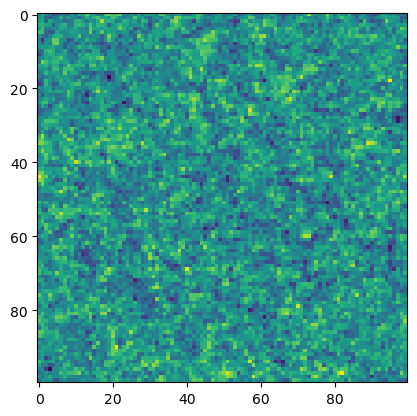

In [12]:
plt.imshow(delta_x[:, :, 0])

In [13]:
n_x = n_mean * (1 + delta_x) # passato da campo di contrasto a campo di densità

In [14]:
Nobj_x = n_x * spacing ** 3

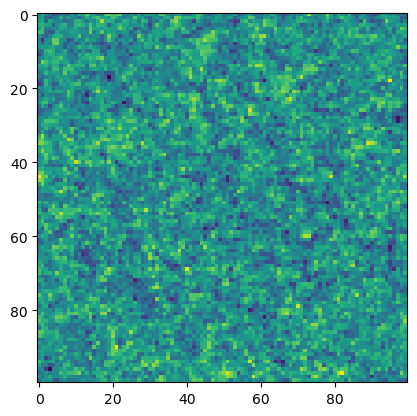

In [15]:
plt.imshow(Nobj_x[:, :, 0])

In [16]:
Nobj_x[0,0,0] # ottieni valore diverso da lui!!

0.11617516161517692

In [17]:
# Import a discrete sample
# Put the sample on a grid using NGP

In [18]:
Npart = np.random.poisson(Nobj_x)

ValueError: lam < 0 or lam contains NaNs

In [ ]:
Npart

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [1, 0, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 1, 1, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [2, 1, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 1, 0, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 

In [19]:
Npart.shape

NameError: name 'Npart' is not defined

In [20]:
np.sum(Npart) # più o meno numero medio atteso di particelle 

NameError: name 'Npart' is not defined

In [21]:
delta_N_x = Npart / np.sum(Npart) - 1

NameError: name 'Npart' is not defined

In [22]:
####
plt.hist(delta_N_x.flatten(), bins=100, density=True);

NameError: name 'delta_N_x' is not defined

In [ ]:

k_bin, pk_N_meas = get_power_spectrum(delta_N_x, side, spacing, n_kF=n_kF)

TypeError: 'tuple' object cannot be interpreted as an integer

In [ ]:
plt.loglog(k_bin, pk_meas, 'o', color='b', label='Measured')
plt.loglog(kh, pk[0], color='r', label='Theoretical')
plt.loglog(k_bin, pk_N_meas, 'o', color='g', label='Measured N')

NameError: name 'k_bin' is not defined

In [ ]:
# Termine in più, è termine di shot noise;
# tanto più alta è la densità meno domina il termine di shot noise 